In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('train.csv')
data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [131]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [132]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

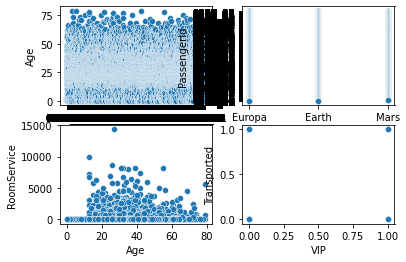

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(2,2)
sns.scatterplot(x=data['PassengerId'],y=data['Age'],data=data,ax=axes[0,0])
sns.scatterplot(x=data['HomePlanet'],y=data['PassengerId'],data=data,ax=axes[0,1])
sns.scatterplot(x=data['Age'],y=data['RoomService'],data=data,ax=axes[1,0])
sns.scatterplot(x=data['VIP'],y=data['Transported'],data=data,ax=axes[1,1])
plt.show()


In [42]:
data['PassengerId']=data['PassengerId'].str.replace('_','')
data['PassengerId'].head()
data['Cabin']=data['Cabin'].str.replace('/','')
data['Cabin'].head()
data=data.drop('PassengerId',axis=1)

In [43]:
from sklearn.model_selection import train_test_split
data.drop('HomePlanet',axis=1)
X_df=data.drop('Transported',axis=1)
y_df=data['Transported']
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(6954, 12)
(1739, 12)
(6954,)


In [44]:

numerical_cols = X_train.select_dtypes(exclude='object')
categorical_cols = X_train.select_dtypes(include='object')


In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def get_score(X_test,y_test,model):
    y_pred=model.predict(X_test)
    score=mean_absolute_error(y_true=y_test,y_pred=y_pred)
    return score

In [46]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer

ordinal_encoder=OrdinalEncoder()
one_hot_encoder=OneHotEncoder(handle_unknown='ignore')
numerical_simple_imputer= SimpleImputer(strategy='mean')
categorical_imputer=SimpleImputer(strategy='most_frequent')
standard_scaler=StandardScaler()
min_max_scaler=MinMaxScaler()
power_transformer=PowerTransformer(method='yeo-johnson')


In [47]:
cols_with_missing_vals = [col for col in X_train.columns if X_train[col].isnull().any()]

categorical_imputed=pd.DataFrame(categorical_imputer.fit_transform(categorical_cols),columns=categorical_cols.columns)
categorical_imputed.isnull().sum()
categotical_imputed_encoded=pd.DataFrame(ordinal_encoder.fit_transform(categorical_imputed),columns=categorical_cols.columns)


In [48]:
numerical_imputed=pd.DataFrame(numerical_simple_imputer.fit_transform(numerical_cols),columns=numerical_cols.columns)
numerical_imputed.isnull().sum()
X_train_final=pd.concat([numerical_imputed,categotical_imputed_encoded],axis=1)
X_train_final.shape

(6954, 12)

In [49]:

num_cols_x_test = X_test.select_dtypes(exclude='object')
cat_cols_x_test = X_test.select_dtypes(include='object')

if not num_cols_x_test.empty:
    num_x = numerical_simple_imputer.fit_transform(num_cols_x_test)
else:
    num_x = num_cols_x_test

if not cat_cols_x_test.empty:
    cat_x = categorical_imputer.fit_transform(cat_cols_x_test)
else:
    cat_x = cat_cols_x_test 

X_test = pd.concat([pd.DataFrame(num_x, columns=num_cols_x_test.columns), pd.DataFrame(cat_x, columns=cat_cols_x_test.columns)], axis=1)


In [13]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
xgb=XGBClassifier()
param_dist = {
    'n_estimators': np.arange(100, 1001, 100), 
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': np.arange(3, 11),  
    'min_child_weight': np.arange(1, 11),  
    'subsample': np.arange(0.7, 1.0, 0.1),  
    'colsample_bytree': np.arange(0.7, 1.0, 0.1),  
    'gamma': [0, 0.1, 0.2],  
    'reg_alpha': [0, 0.01, 0.1], 
    'reg_lambda': [0, 0.01, 0.1], 
}

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)
best_params = random_search.best_params_
best_xgb_model = random_search.best_estimator_
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 400, 'min_child_weight': 10, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9999999999999999}


In [ ]:
random_forest=RandomForestClassifier(random_state=0)
power=PowerTransformer(method='yeo-johnson')
X_train_power=power.fit_transform(X_train_final)

param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, n_iter=100, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
random_search.fit(X_train_power, y_train)
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_
best_rf_score=random_search.best_score_
print("Best Hyperparameters:", best_params)
print("best Score: ",best_rf_score)

In [ ]:
ada_model=AdaBoostClassifier(random_state=0)

param_dist = {
    'n_estimators': np.arange(50, 200, 10), 
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

random_search = RandomizedSearchCV(estimator=ada_model, param_distributions=param_dist, n_iter=100, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
random_search.fit(X_train_power, y_train)
best_params = random_search.best_params_
best_ada_model = random_search.best_estimator_
best_ada_score=random_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score", best_ada_score)

In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_trees': np.arange(10, 101, 10),
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'num_candidate_attributes': [None, 'auto', 0.5, 0.7, 0.8, 0.9],
    'split_axis': ['cart', 'rspf', 'cart-bordacount', 'cart-namespace', 'cart-impurity'],
}

decision_forest = tfdf.keras.RandomForestModel(task="classification")
random_search = RandomizedSearchCV(estimator=decision_forest, param_distributions=param_dist, n_iter=100, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
random_search.fit(X_train_power, y_train)
best_params = random_search.best_params_
best_decision_forest_model = random_search.best_estimator_


In [83]:

X_train_min=pd.DataFrame(power_transformer.fit_transform(X_train_final),columns=X_train_final.columns)
X_test=pd.DataFrame(ordinal_encoder.fit_transform(X_test),columns=X_train_final.columns)
X_test_min=pd.DataFrame(min_max_scaler.fit_transform(X_test),columns=X_test.columns)

In [84]:
best_xgb_model.fit(X_train_min,y_train)
best_rf_model.fit(X_train_min,y_train)
best_ada_model.fit(X_train_min,y_train)
best_decision_forest_model.fit(X_test_min,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=150, random_state=0)

In [85]:
y_test = ordinal_encoder.fit_transform(y_test.reshape(-1, 1))

score_xgb = get_score(X_test=X_test, y_test=y_test, model=best_xgb_model)
print("XGBoost Score:", score_xgb)

score_rf = get_score(X_test=X_test, y_test=y_test, model=best_rf_model)
print("Random Forest Score:", score_rf)

score_ada = get_score(X_test=X_test, y_test=y_test, model=best_ada_model)
print("AdaBoost Score:", score_ada)


XGBoost Score: 0.28004600345025876
Random Forest Score: 0.2610695802185164
AdaBoost Score: 0.2852213916043703


In [97]:
chosen_model=best_rf_model
test_df=pd.read_csv('test.csv')
test_df=test_df.drop('PassengerId',axis=1)
test_df['Cabin']=test_df['Cabin'].str.replace('/','')


num_cols_x_test = test_df.select_dtypes(exclude='object')
cat_cols_x_test = test_df.select_dtypes(include='object')

if not num_cols_x_test.empty:
    num_x = numerical_simple_imputer.fit_transform(num_cols_x_test)
else:
    num_x = num_cols_x_test

if not cat_cols_x_test.empty:
    cat_x = categorical_imputer.fit_transform(cat_cols_x_test)
else:
    cat_x = cat_cols_x_test 

test_df = pd.concat([pd.DataFrame(num_x, columns=num_cols_x_test.columns), pd.DataFrame(cat_x, columns=cat_cols_x_test.columns)], axis=1)
test_df=pd.DataFrame(ordinal_encoder.fit_transform(test_df),columns=test_df.columns)
test_df=pd.DataFrame(power_transformer.fit_transform(test_df),columns=X_train_final.columns)



In [87]:
test_df2=pd.read_csv('test.csv')

In [98]:
predictions=pd.DataFrame(chosen_model.predict(test_df))
predictions['PassengerId'] = test_df2['PassengerId']
predictions.columns=['Transported','PassengerId']
predictions['Transported'] = predictions['Transported'].apply(lambda x: x > 0.5)
predictions=predictions[['PassengerId','Transported']]
file_name='predictions1.csv'

predictions.to_csv(file_name, index=False)


In [99]:
predictions.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
